In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
etude_prolific = pd.read_csv("data/transform/etude_prolific_processed.csv")

In [3]:
etude_prolific.head()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Total approvals,Sex,...,creativity_idea_count,creativity_technical_terms,creativity_security_focus,creativity_innovation_words,creativity_practical_solutions,creativity_composite_score,creativity_level_category,socioeconomic_profile,demographic_profile,estimated_age_group
0,68b8857da6c27cdd828802b4,58bfee7de5869400018f5e9e,APPROVED,2025-09-03T18:23:11.467000Z,2025-09-03T18:46:36.735000Z,2025-09-03T18:46:39.998000Z,2025-09-03T18:46:37.262895Z,1406.0,3954,Male,...,3,1,2,0,0,0.19,low,working_professional,male_non_student,adult
1,Multi-factor voice authentication: the voice a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
2,Distributed cloud: connected device data is st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
3,Assistant that warns: when a suspicious attemp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
4,Trust labels: each connected device clearly di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult


In [4]:
etude_prolific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Submission id                              423 non-null    object 
 1   Participant id                             81 non-null     object 
 2   Status                                     86 non-null     object 
 3   Started at                                 87 non-null     object 
 4   Completed at                               87 non-null     object 
 5   Reviewed at                                77 non-null     object 
 6   Archived at                                73 non-null     object 
 7   Time taken                                 61 non-null     object 
 8   Total approvals                            57 non-null     object 
 9   Sex                                        53 non-null     object 
 10  Ethnicity simplified      

In [5]:
etude_prolific.columns

Index(['Submission id', 'Participant id', 'Status', 'Started at',
       'Completed at', 'Reviewed at', 'Archived at', 'Time taken',
       'Total approvals', 'Sex', 'Ethnicity simplified', 'Country of birth',
       'Country of residence', 'Nationality', 'Language', 'Student status',
       'Employment status', 'Session ID', 'Groupe',
       'Question de brainstorming (onboarding)',
       'Session de brainstorming (initial_survey)',
       'Question final (brainstorming_session)',
       'Temps de complétion (final_survey)', 'Metadata (Json)', 'gender',
       'student_category', 'employment_category', 'primary_language',
       'birth_country_category', 'experimental_group', 'question_type',
       'valid_prolific_participant', 'creativity_response_length',
       'creativity_idea_count', 'creativity_technical_terms',
       'creativity_security_focus', 'creativity_innovation_words',
       'creativity_practical_solutions', 'creativity_composite_score',
       'creativity_level_cate

In [6]:
mapping_dict = {
    # Identifiants & métadonnées
    'Submission id': 'sub_id',
    'Participant id': 'participant_id', 
    'Session ID': 'session_id',
    'Status': 'status',
    'Started at': 'start_time',
    'Completed at': 'end_time',
    'Reviewed at': 'review_time',
    'Archived at': 'archive_time',
    'Time taken': 'duration',
    'Total approvals': 'approvals',
    
    # Données démographiques originales
    'Sex': 'gender_orig',
    'Ethnicity simplified': 'ethnicity',
    'Country of birth': 'birth_country_orig',
    'Country of residence': 'residence_country',
    'Nationality': 'nationality',
    'Language': 'language_orig',
    'Student status': 'student_orig',
    'Employment status': 'employment_orig',
    
    # Données expérimentales
    'Groupe': 'group_orig',
    'Question de brainstorming (onboarding)': 'question_prompt',
    'Session de brainstorming (initial_survey)': 'creative_response',
    'Question final (brainstorming_session)': 'final_question',
    'Temps de complétion (final_survey)': 'final_duration',
    'Metadata (Json)': 'metadata_json',
    
    # Variables démographiques transformées
    'gender': 'gender',
    'student_category': 'student_cat',
    'employment_category': 'employ_cat',
    'primary_language': 'language',
    'birth_country_category': 'birth_country',
    'socioeconomic_profile': 'socio_profile',
    'demographic_profile': 'demo_profile',
    'estimated_age_group': 'age_group',
    
    # Variables expérimentales transformées
    'experimental_group': 'exp_group',
    'question_type': 'question_type',
    'valid_prolific_participant': 'valid_participant',
    
    # Métriques de créativité
    'creativity_response_length': 'creativity_length',
    'creativity_idea_count': 'creativity_ideas',
    'creativity_technical_terms': 'creativity_tech',
    'creativity_security_focus': 'creativity_security',
    'creativity_innovation_words': 'creativity_innovation',
    'creativity_practical_solutions': 'creativity_practical',
    'creativity_composite_score': 'creativity_score',
    'creativity_level_category': 'creativity_level'
}

In [7]:
etude_prolific.rename(columns=mapping_dict, inplace=True)
etude_prolific.head()

,sub_id,participant_id,status,start_time,end_time,review_time,archive_time,duration,approvals,gender_orig,...,creativity_ideas,creativity_tech,creativity_security,creativity_innovation,creativity_practical,creativity_score,creativity_level,socio_profile,demo_profile,age_group
0,68b8857da6c27cdd828802b4,58bfee7de5869400018f5e9e,APPROVED,2025-09-03T18:23:11.467000Z,2025-09-03T18:46:36.735000Z,2025-09-03T18:46:39.998000Z,2025-09-03T18:46:37.262895Z,1406.0,3954,Male,...,3,1,2,0,0,0.19,low,working_professional,male_non_student,adult
1,Multi-factor voice authentication: the voice a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
2,Distributed cloud: connected device data is st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
3,Assistant that warns: when a suspicious attemp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult
4,Trust labels: each connected device clearly di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.00,none,other,other_unknown,adult


In [8]:
for col in etude_prolific.select_dtypes(include=['object']).columns:
    print(f"{col}: {etude_prolific[col].nunique()} unique values")

sub_id: 345 unique values
participant_id: 81 unique values
status: 36 unique values
start_time: 73 unique values
end_time: 79 unique values
review_time: 66 unique values
archive_time: 66 unique values
duration: 56 unique values
approvals: 56 unique values
gender_orig: 4 unique values
ethnicity: 6 unique values
birth_country_orig: 7 unique values
residence_country: 4 unique values
nationality: 1 unique values
language_orig: 1 unique values
student_orig: 3 unique values
employment_orig: 6 unique values
session_id: 51 unique values
group_orig: 2 unique values
question_prompt: 3 unique values
creative_response: 37 unique values
gender: 3 unique values
student_cat: 3 unique values
employ_cat: 6 unique values
language: 2 unique values
birth_country: 4 unique values
exp_group: 3 unique values
question_type: 3 unique values
creativity_level: 4 unique values
socio_profile: 5 unique values
demo_profile: 7 unique values
age_group: 2 unique values


In [15]:
etude_prolific['group_orig'].value_counts(dropna=False)

group_orig
NaN    372
A       40
B       11
Name: count, dtype: int64

In [22]:
nan_tab =etude_prolific.isna().sum().reset_index()
nan_tab.columns = ['column', 'n_nan_count']

not_null_columns = etude_prolific.columns[etude_prolific.notnull().all()]
not_null_columns

Index(['sub_id', 'gender', 'student_cat', 'employ_cat', 'language',
       'birth_country', 'exp_group', 'question_type', 'valid_participant',
       'creativity_length', 'creativity_ideas', 'creativity_tech',
       'creativity_security', 'creativity_innovation', 'creativity_practical',
       'creativity_score', 'creativity_level', 'socio_profile', 'demo_profile',
       'age_group'],
      dtype='object')

In [ ]:
nan_tab.drop(nan_tab[nan_tab['n_nan_count'] == 0].index, inplace=True)
nan_tab.head()

,column,n_nan_count
1,participant_id,342
2,status,337
3,start_time,336
4,end_time,336
5,review_time,346


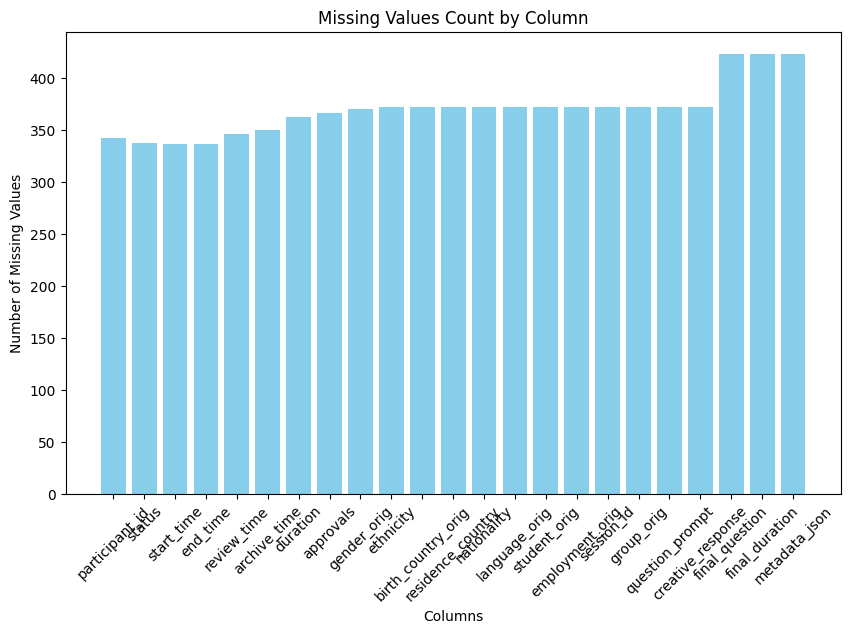

In [21]:
plt.figure(figsize=(10,6))
plt.bar(nan_tab['column'], nan_tab['n_nan_count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()